In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
dataset = pd.read_csv('2018_1hourdata.csv')

In [4]:
dataset.head()

,Time,SACR_SUNN_in,SACR_SUNN_out,LOND_NEWY_in,LOND_NEWY_out,JGI_SACR_in,JGI_SACR_out,HOUS_PANTEX_in,HOUS_PANTEX_out,BOIS_PNWG_in,...,AMST_LOND_in,AMST_LOND_out,FNAL_STAR_in,FNAL_STAR_out,BOST_STAR_in,BOST_STAR_out,BOST_NEWY_in,BOST_NEWY_out,ATLA_WASH_in,ATLA_WASH_out
0,1/1/18 8:00,1.411093e+10,1.025131e+10,1.109243e+09,8.683116e+09,8.289831e+07,471952486.5,56650005.21,28102344.40,1.117868e+07,...,3.131858e+09,1.290804e+10,6.221437e+07,4.177833e+07,6.127005e+09,1.505475e+10,1.116761e+10,2.391813e+09,3.005335e+09,5.993152e+09
1,1/1/18 9:00,1.345362e+10,9.191558e+09,1.242256e+09,5.181239e+09,4.375739e+04,470169221.0,49307351.26,20240358.57,7.070847e+06,...,4.157574e+09,7.468747e+09,1.943452e+08,3.058273e+08,4.952796e+09,1.096238e+10,7.879534e+09,2.225971e+09,3.043124e+09,4.402875e+09
2,1/1/18 10:00,1.216888e+10,7.793842e+09,2.006322e+09,1.224286e+10,4.315725e+04,254319077.6,56843652.59,13076249.56,5.132826e+07,...,6.164468e+09,1.451626e+10,2.368597e+08,2.297360e+08,7.193835e+09,1.840171e+10,1.573402e+10,2.598615e+09,3.254450e+09,3.451973e+09
3,1/1/18 11:00,1.123120e+10,7.097238e+09,1.073181e+09,4.717642e+09,8.277154e+07,167067135.5,46645240.59,15344128.69,5.217827e+06,...,3.856222e+09,7.139046e+09,2.644591e+07,8.776042e+07,4.389148e+09,7.153226e+09,7.690503e+09,1.992397e+09,3.717638e+09,5.663406e+09
4,1/1/18 12:00,1.078085e+10,8.048294e+09,8.645069e+08,1.987249e+09,3.343548e+04,113702282.5,30966947.37,23023533.87,7.495363e+06,...,2.483093e+09,4.691328e+09,3.782775e+07,7.183373e+07,2.982568e+09,4.568829e+09,4.828736e+09,2.083069e+09,3.753083e+09,4.915730e+09


In [5]:
dataset.shape

(8760, 97)

In [20]:

X = dataset.iloc[:, [1,-1]].values

(8760, 2)

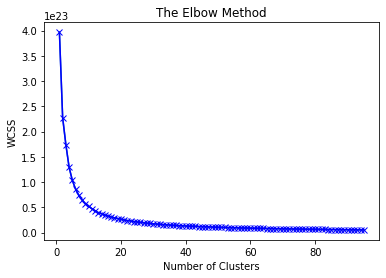

In [22]:
#To find out the optimal number of cluseters we use the elbow method
#within cluster sum of errors
from sklearn.cluster import KMeans

wcss = []
K = range(1,96)
for i in range(1,96):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,96), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.plot(K, wcss, 'bx-')
plt.show()

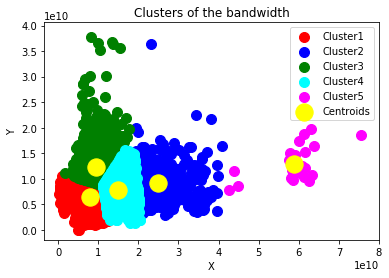

In [27]:
kmeans= KMeans(n_clusters = 5, init = 'k-means++', max_iter =300, n_init =10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of the bandwidth')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()